In [2]:
%matplotlib inline

Automatically created module for IPython interactive environment


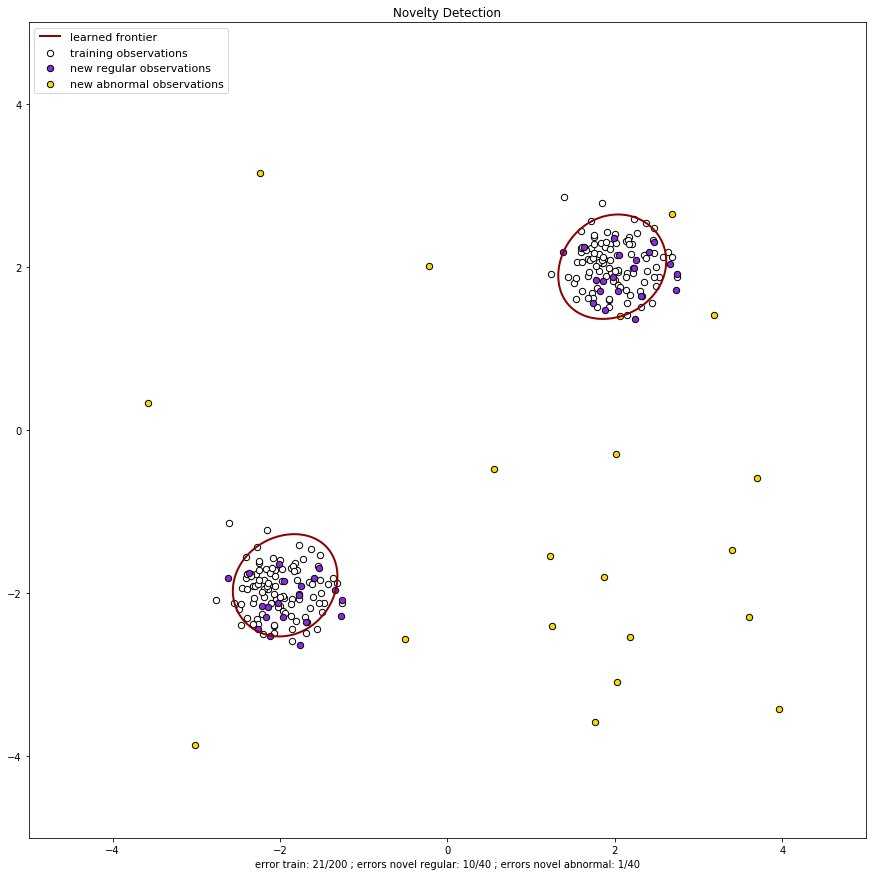

In [13]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.gcf().set_size_inches(15, 15)

# print contours shaded (ignore it is just for showing off):
# plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)

# print contour:
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

# fill contour:
# plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [17]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm


def convert_to_matrix(dataframe, *columns):
    '''Converts dataframe[columns] into a numpy RxC matrix (R=len(dataframe)
    and C=len(columns)) to be fed into OneClassSvm.
    E.g. i.e. for R=3 and C=2, it returns something like (made up numbers):
    [
     [ 2.08392292  1.80265644]
     [ 2.14072406  2.69179574]
     [ 2.43840883  2.22888996]
    ]
    
    :param dataframe: pandas DataFrame
    :param columns: list of string denoting the columns of `dataframe` that represents
        the feature space to fit the classifier with
    '''
    return (dataframe if not columns else dataframe[columns]).values

def ocsvm_fit(dataframe, *columns, **kwargs):
    '''Returns a OneClassSVM classifier fitted with the data of
    `dataframe`.
    
    :param dataframe: pandas DataFrame
    :param columns: list of string denoting the columns of `dataframe` that represents
        the feature space to fit the classifier with
    :param kwargs: parameters to be passed to OneClassSVM
    '''
    clf = svm.OneClassSVM(**kwargs)
    clf.fit(convert_to_matrix(dataframe, *columns))
    return clf

def predict(clf, dataframe, *columns):
    '''Returns a numpy array of len(dataframe) integers in [-1, 1],
    where:
    -1: item is classified as OUTLIER
     1: item is classified as OK (no outlier)
    Each number at index I is the prediction (classification) of
    the I-th element of `dataframe`
    
    :param clf: the given (trained) classifier 
    :param dataframe: pandas DataFrame
    :param columns: list of string denoting the columns of `dataframe` that represents
        the feature space to fit the classifier with

    '''
    return clf.predict(convert_to_matrix(dataframe, *columns))

Automatically created module for IPython interactive environment


SHOWING LERNED FRONTIERS WITH SEVERAL RBF PARAMETERS


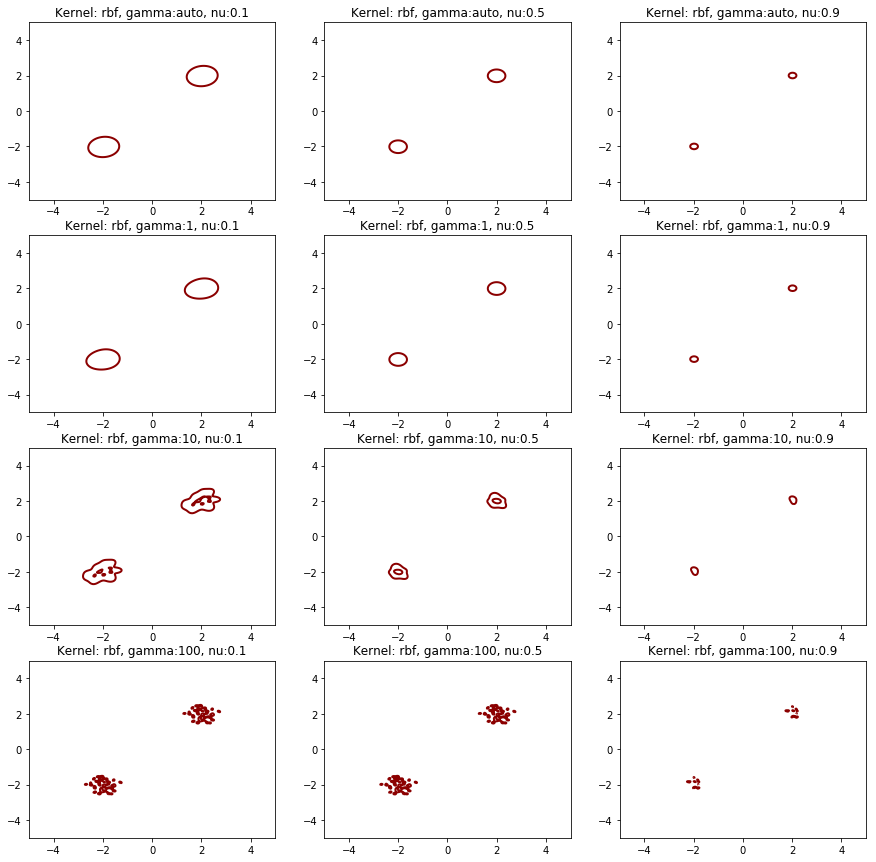

In [36]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

gammas = ['auto', 1, 10, 100]
nus = [0.1, 0.5, .9]
rows, cols, index = len(gammas), len(nus), 1

print('SHOWING LERNED FRONTIERS WITH SEVERAL RBF PARAMETERS')
for kernel in ['rbf']:  # 'sigmoid' , 'poly'
    for gamma in gammas:
        for nu in nus:
            # fit the model
            clf = svm.OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)  #, verbose=False)
            clf.fit(X_train)
            y_pred_train = clf.predict(X_train)
            y_pred_test = clf.predict(X_test)
            y_pred_outliers = clf.predict(X_outliers)

            n_error_train = y_pred_train[y_pred_train == -1].size
            n_error_test = y_pred_test[y_pred_test == -1].size
            n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

            # =========================================

            # plot the line, the points, and the nearest vectors to the plane
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            plt.subplot(rows, cols, index)
            index += 1

            plt.title("Kernel: %s, gamma:%s, nu:%s" % (kernel, str(gamma), str(nu)))
            plt.gcf().set_size_inches(15, 15)

            # print contours shaded (ignore it is just for showing off):
            # plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)

            # print contour:
            a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

            # fill contour:
            # plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

            s = 40
            # b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
            # b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
            # c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')
            plt.axis('tight')
            plt.xlim((-5, 5))
            plt.ylim((-5, 5))
#             plt.legend([a.collections[0], b1, b2, c],
#                        ["learned frontier", "training observations",
#                         "new regular observations", "new abnormal observations"],
#                        loc="upper left",
#                        prop=matplotlib.font_manager.FontProperties(size=11))
#             plt.xlabel(
#                 "error train: %d/200 ; errors novel regular: %d/40 ; "
#                 "errors novel abnormal: %d/40"
#                 % (n_error_train, n_error_test, n_error_outliers))
plt.show()